In [ ]:
from google.colab import files
files.download('big_demo_dataset.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import numpy as np
import pandas as pd

# for reproducibility
np.random.seed(42)

# ---------- CLASS SIZES ----------
n_normal = 400
n_warning = 350
n_critical = 250

# ---------- NORMAL CLASS ----------
# low vibration & sound, small spread
norm_vib = np.random.normal(loc=120, scale=15, size=n_normal)
norm_sound = np.random.normal(loc=210, scale=20, size=n_normal)

# ---------- WARNING CLASS (Option B style) ----------
# moderate vibration increase, bigger variation in sound
warn_vib = np.random.normal(loc=330, scale=35, size=n_warning)
warn_sound = np.random.normal(loc=460, scale=60, size=n_warning)

# ---------- CRITICAL CLASS ----------
# high vibration & sound, larger spread
crit_vib = np.random.normal(loc=700, scale=50, size=n_critical)
crit_sound = np.random.normal(loc=860, scale=80, size=n_critical)

# ---------- MAKE IT LOOK NICE (no negatives) ----------
norm_vib = np.clip(norm_vib, 80, 180)
norm_sound = np.clip(norm_sound, 160, 280)

warn_vib = np.clip(warn_vib, 220, 480)
warn_sound = np.clip(warn_sound, 320, 700)

crit_vib = np.clip(crit_vib, 520, 920)
crit_sound = np.clip(crit_sound, 620, 1200)

# ---------- BUILD DATAFRAME ----------
vibration = np.concatenate([norm_vib, warn_vib, crit_vib])
sound = np.concatenate([norm_sound, warn_sound, crit_sound])
labels = (['normal'] * n_normal +
          ['warning'] * n_warning +
          ['critical'] * n_critical)

df = pd.DataFrame({
    'vibration': vibration.round().astype(int),
    'sound': sound.round().astype(int),
    'label': labels
})

print(df.head())
print("\nClass counts:\n", df['label'].value_counts())

# ---------- SAVE TO CSV ----------
df.to_csv('big_demo_dataset.csv', index=False)
print("\nSaved as big_demo_dataset.csv")


   vibration  sound   label
0        127    178  normal
1        118    198  normal
2        130    210  normal
3        143    211  normal
4        116    201  normal

Class counts:
 label
normal      400
warning     350
critical    250
Name: count, dtype: int64

Saved as big_demo_dataset.csv


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

X = df[['vibration', 'sound']]
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

    critical       1.00      1.00      1.00        49
      normal       1.00      1.00      1.00        81
     warning       1.00      1.00      1.00        70

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



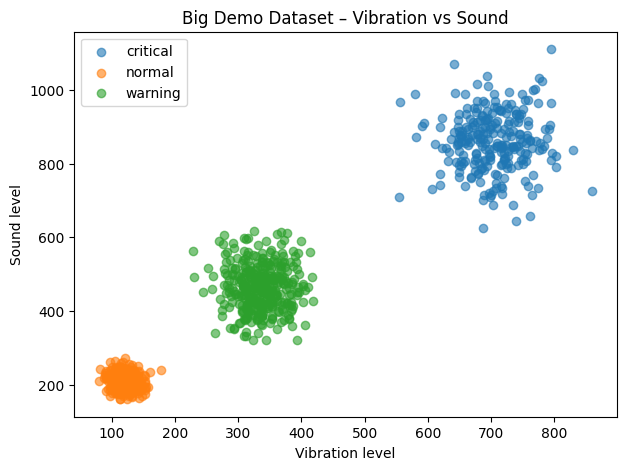

In [ ]:
import matplotlib.pyplot as plt

colors = {'normal': 'green', 'warning': 'orange', 'critical': 'red'}

plt.figure(figsize=(7,5))
for label, group in df.groupby('label'):
    plt.scatter(group['vibration'], group['sound'],
                label=label, alpha=0.6)

plt.xlabel("Vibration level")
plt.ylabel("Sound level")
plt.title("Big Demo Dataset – Vibration vs Sound")
plt.legend()
plt.show()
